# PROJECT OVERVIEW

How to detect ships in the satellite images using deep learning model based on Convolutional Neural Networks (CNNs)? There are many large vessels (ships), sometime illegal in sea, how Artificial Intelligence (AI) can help at detecting them ?

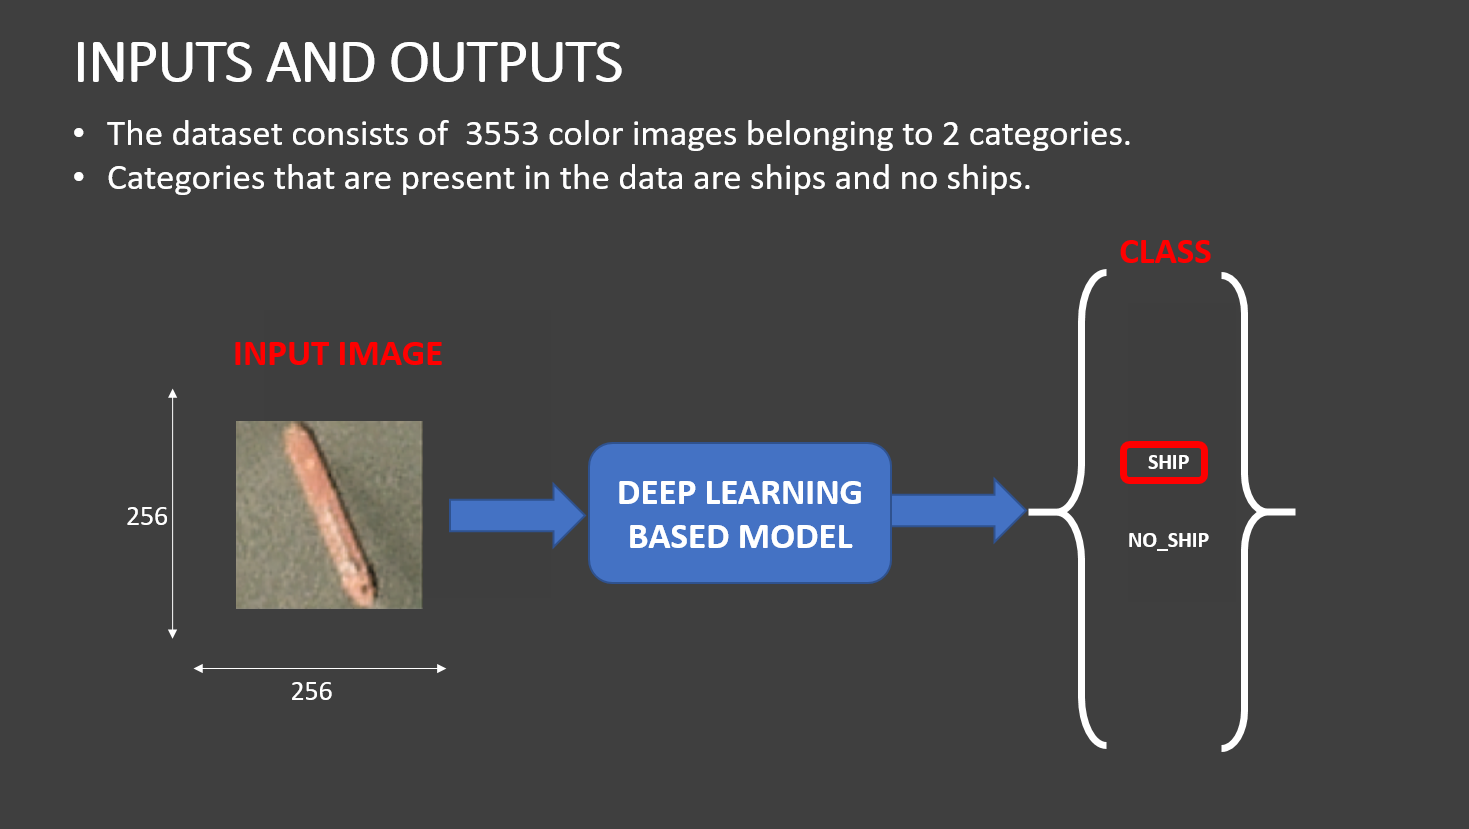

#  IMPORTING LIBRARIES/DATASETS

In [1]:
# !pip install tensorflow==2.0

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# import the necessary packages
import json, sys, random, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import seaborn as sns

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from PIL import Image, ImageDraw 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [5]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [6]:
# Check the number of images in the dataset

train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('./Data'):
  train_class = os.listdir(os.path.join('Data',i))
  for j in train_class:
    img = os.path.join('Data',i,j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 4000 



In [7]:
train

['Data\\no-ship\\no-ship_000000.png',
 'Data\\no-ship\\no-ship_000001.png',
 'Data\\no-ship\\no-ship_000002.png',
 'Data\\no-ship\\no-ship_000003.png',
 'Data\\no-ship\\no-ship_000004.png',
 'Data\\no-ship\\no-ship_000005.png',
 'Data\\no-ship\\no-ship_000006.png',
 'Data\\no-ship\\no-ship_000007.png',
 'Data\\no-ship\\no-ship_000008.png',
 'Data\\no-ship\\no-ship_000009.png',
 'Data\\no-ship\\no-ship_000010.png',
 'Data\\no-ship\\no-ship_000011.png',
 'Data\\no-ship\\no-ship_000012.png',
 'Data\\no-ship\\no-ship_000013.png',
 'Data\\no-ship\\no-ship_000014.png',
 'Data\\no-ship\\no-ship_000015.png',
 'Data\\no-ship\\no-ship_000016.png',
 'Data\\no-ship\\no-ship_000017.png',
 'Data\\no-ship\\no-ship_000018.png',
 'Data\\no-ship\\no-ship_000019.png',
 'Data\\no-ship\\no-ship_000020.png',
 'Data\\no-ship\\no-ship_000021.png',
 'Data\\no-ship\\no-ship_000022.png',
 'Data\\no-ship\\no-ship_000023.png',
 'Data\\no-ship\\no-ship_000024.png',
 'Data\\no-ship\\no-ship_000025.png',
 'Data\\no-s

In [8]:
label

['no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no-ship',
 'no

# PERFORM DATA EXPLORATION AND DATA VISUALIZATION

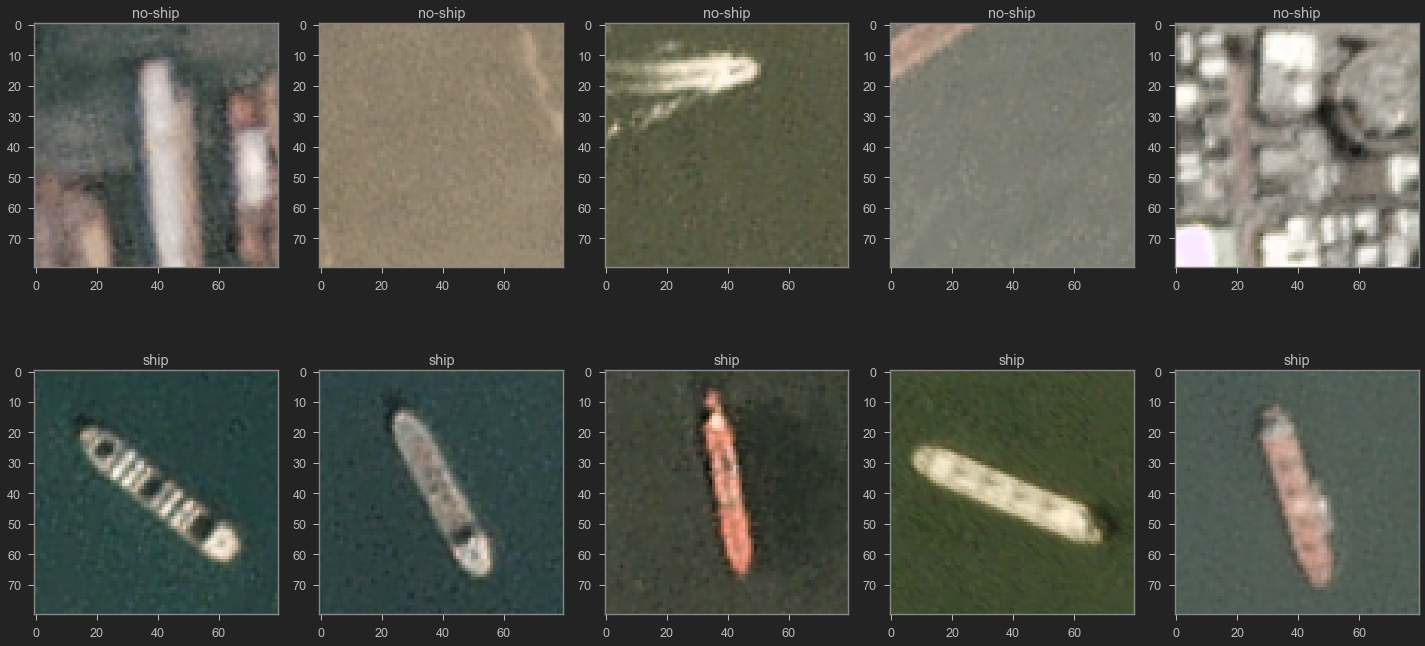

In [9]:
# Visualize the images in the dataset

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
count = 0
for i in os.listdir('./Data'):
  # get the list of images in the particualr class
  train_class = os.listdir(os.path.join('Data',i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('Data',i,train_class[j])
    
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()


MINI CHALLENGE #1:
- Perform a sanity check by exploring additional images (Visualize at least 10 images per class)
THE ANSWER I

In [10]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./Data'):
  train_class = os.listdir(os.path.join('Data',i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i,len(train_class)))

Number of images in no-ship = 3000 

Number of images in ship = 1000 



In [11]:
# Extract ships based on their color spectrum 
# Check this out: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

def color_spectrum_visualizer():
  fig, axs = plt.subplots(2,4, figsize=(20,10))

  # Set the color map 
  plt.set_cmap('jet')
  count = 0
  for i in os.listdir('./Data'):
    # get the list of images in the particular class
    train_class = os.listdir(os.path.join('Data',i))
    # plot 5 images per class
    rand = np.random.randint(0, len(train_class))
    for j in range(3):
      img = os.path.join('Data',i,train_class[rand])
    
      img = PIL.Image.open(img)
      axs[count][j].title.set_text(i)
      channel = np.array(img)[:,:,j]
      axs[count][j].imshow(channel)  
    axs[count][3].imshow(img) 
    count += 1

  fig.tight_layout()


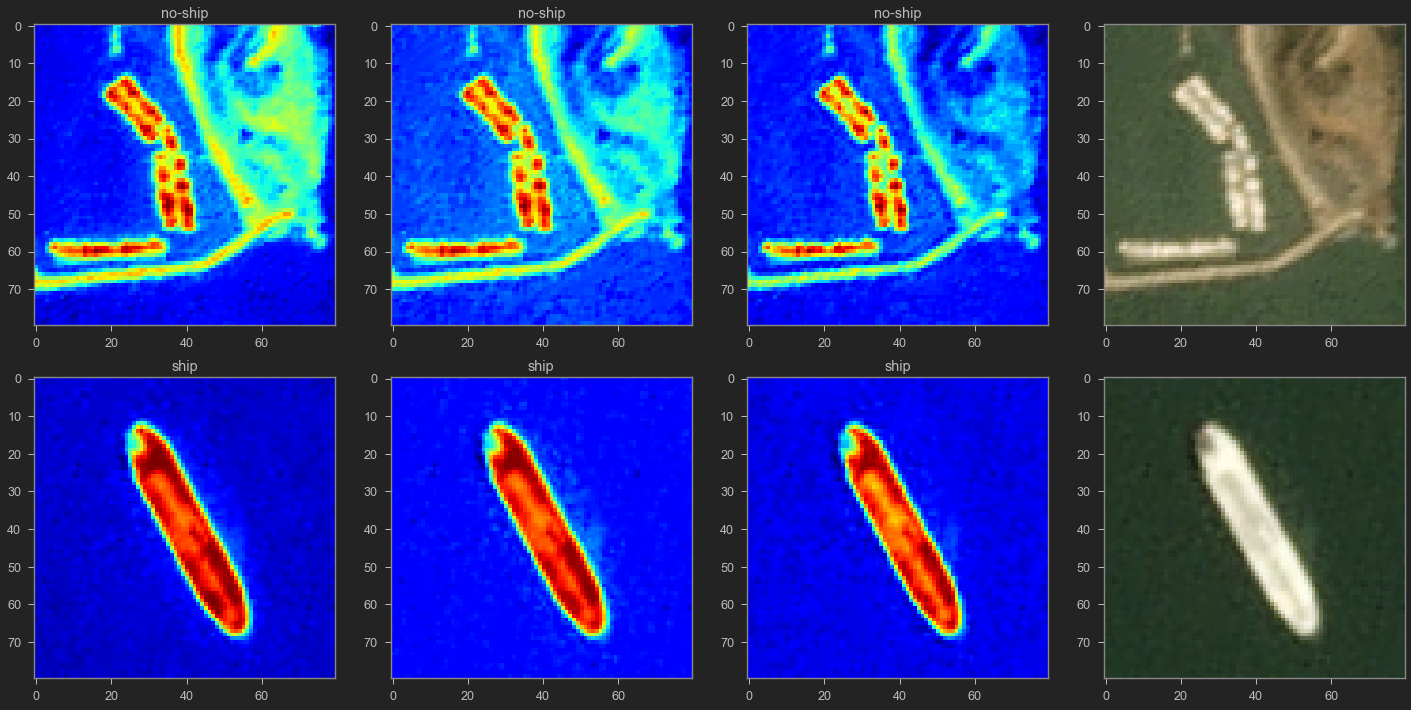

In [12]:
color_spectrum_visualizer()

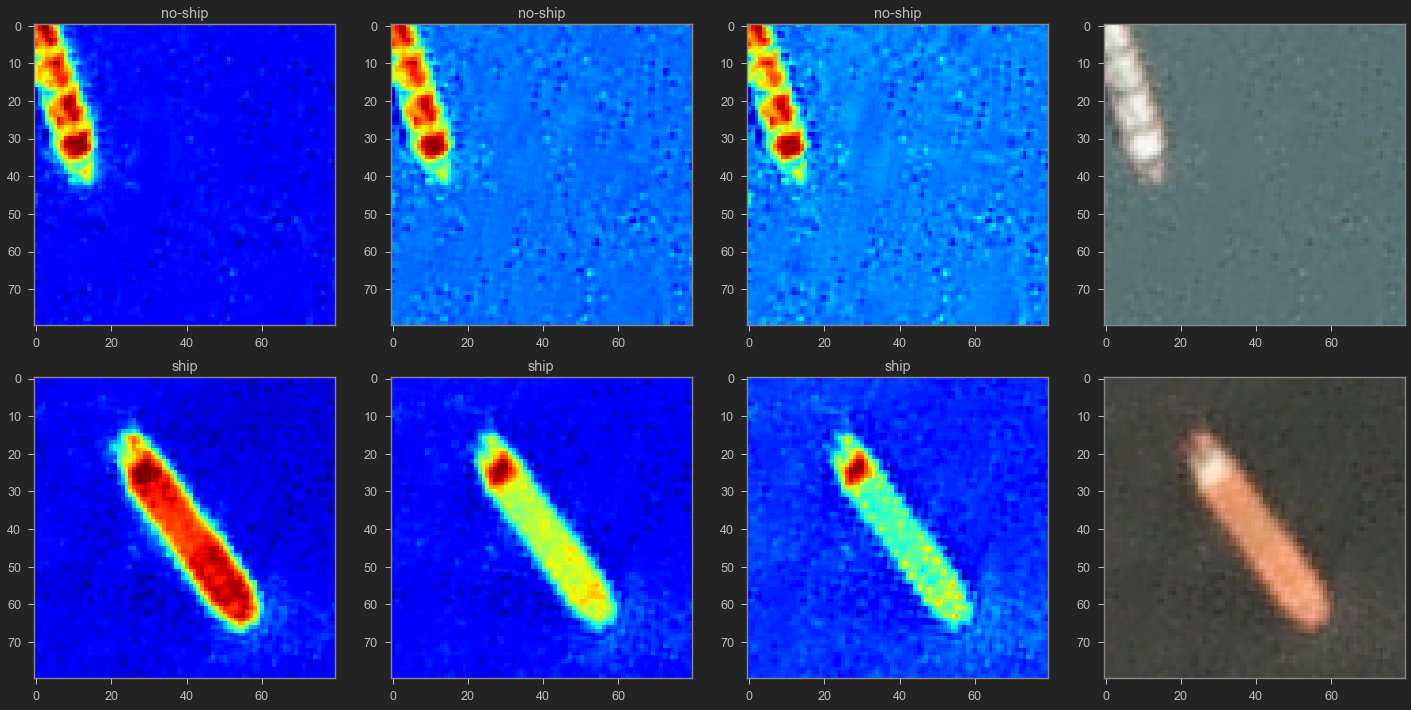

In [13]:
color_spectrum_visualizer()

<function matplotlib.pyplot.show(close=None, block=None)>

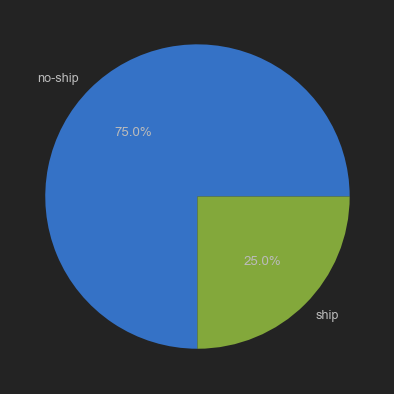

In [14]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

In [15]:
df = pd.DataFrame({'Image': train, 'Labels': label})


In [16]:
df

,Image,Labels
0,Data\no-ship\no-ship_000000.png,no-ship
1,Data\no-ship\no-ship_000001.png,no-ship
2,Data\no-ship\no-ship_000002.png,no-ship
3,Data\no-ship\no-ship_000003.png,no-ship
4,Data\no-ship\no-ship_000004.png,no-ship
...,...,...
3995,Data\ship\ship_000995.png,ship
3996,Data\ship\ship_000996.png,ship
3997,Data\ship\ship_000997.png,ship
3998,Data\ship\ship_000998.png,ship


# PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [17]:
df = shuffle(df)

train, test = train_test_split(df, test_size = 0.2)

In [18]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        validation_split=0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    weight_col=None,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset='training',
    interpolation="nearest"
)

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    weight_col=None,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset='validation',
    interpolation="nearest"
)

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    weight_col=None,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest"
)

Found 2720 validated image filenames belonging to 2 classes.
Found 480 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


MINI CHALLENGE #2:

- Experiment with other image augmentation strategies to the training data. Pick at least 1 augmentation strategy. 

HINT: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator





# UNDERSTAND THE THEORY AND INTUITION BEHIND DEEP LEARNING AND CONVOLUTIONAL NEURAL NETWORKS (CNN)

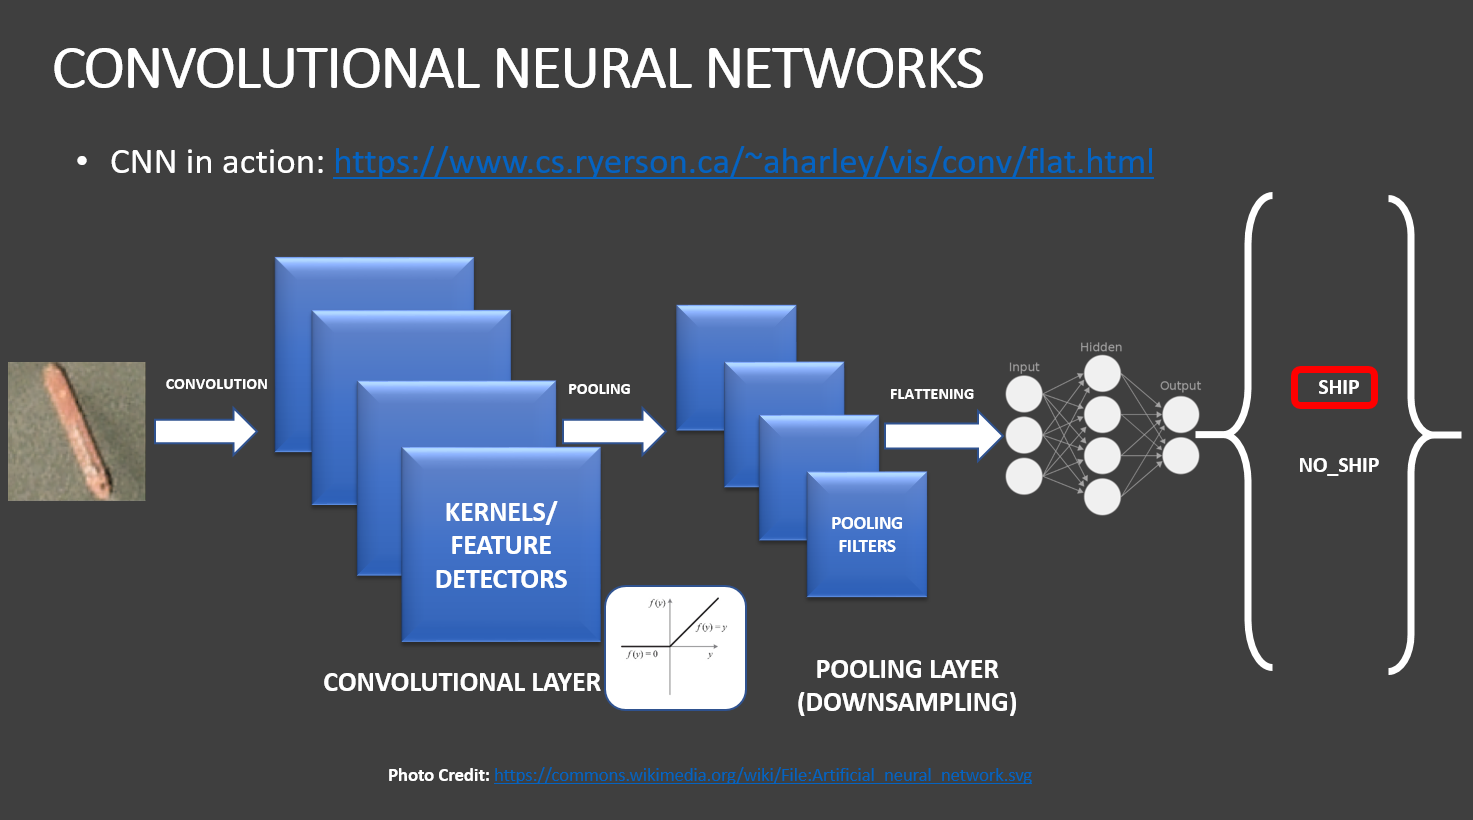

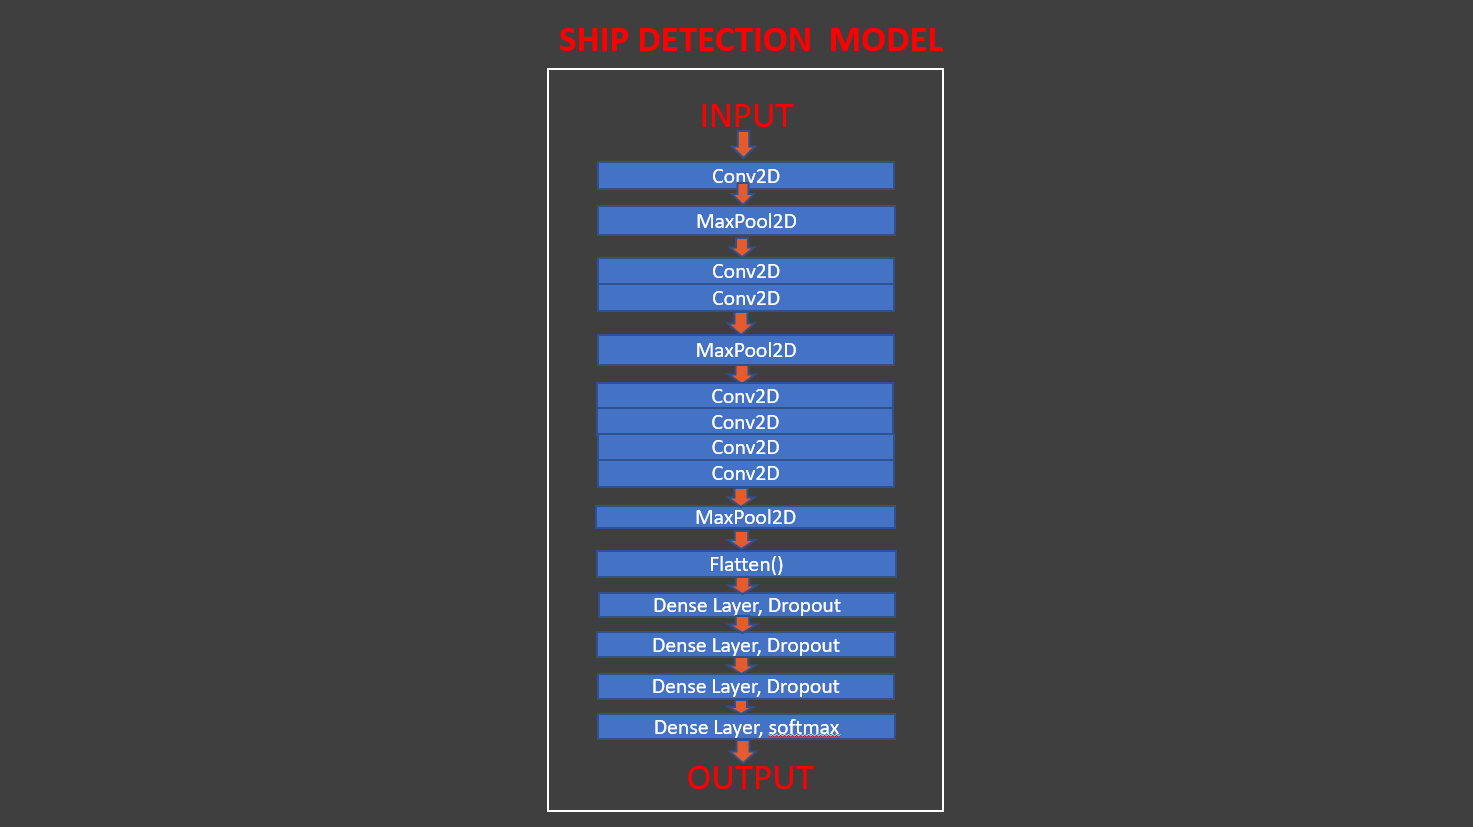

# TASK #6: BUILD A DEEP LEARNING MODEL

In [20]:
model = Sequential()

# 1st  Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4),activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 4th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1),activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1),activation='relu'))

# 6th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu'))

# 7th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096,activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096,activation='relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000,activation='relu'))

# 4th Fully Connected Layer
model.add(Dense(1000,activation='relu'))


# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 256)       221440    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 512)       1180160   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 512)         2

MINI CHALLENGE #3:
- Try adding a dense layer with 1000 neurons, print out model summary and compare performance.

# TASK #7: COMPILE AND TRAIN DEEP LEARNING MODEL

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [22]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [23]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 1, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

85/85 [==============================] - ETA: 0s - loss: 0.5883 - accuracy: 0.7570
Epoch 00001: val_loss improved from inf to 0.58579, saving model to weights.hdf5
85/85 [==============================] - 669s 8s/step - loss: 0.5883 - accuracy: 0.7570 - val_loss: 0.5858 - val_accuracy: 0.7312


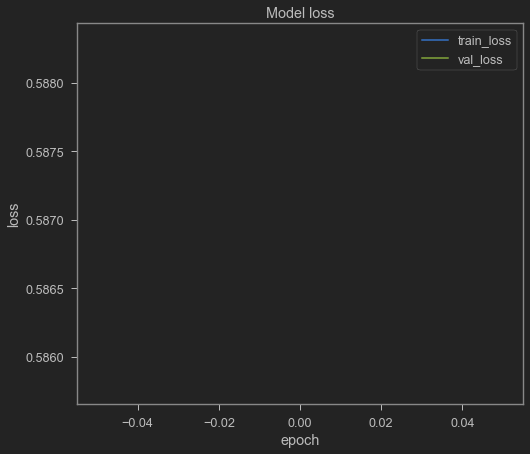

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


MINI CHALLENGE #4:
- Try to use different number of epochs and retrain the model


# TASK #8: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

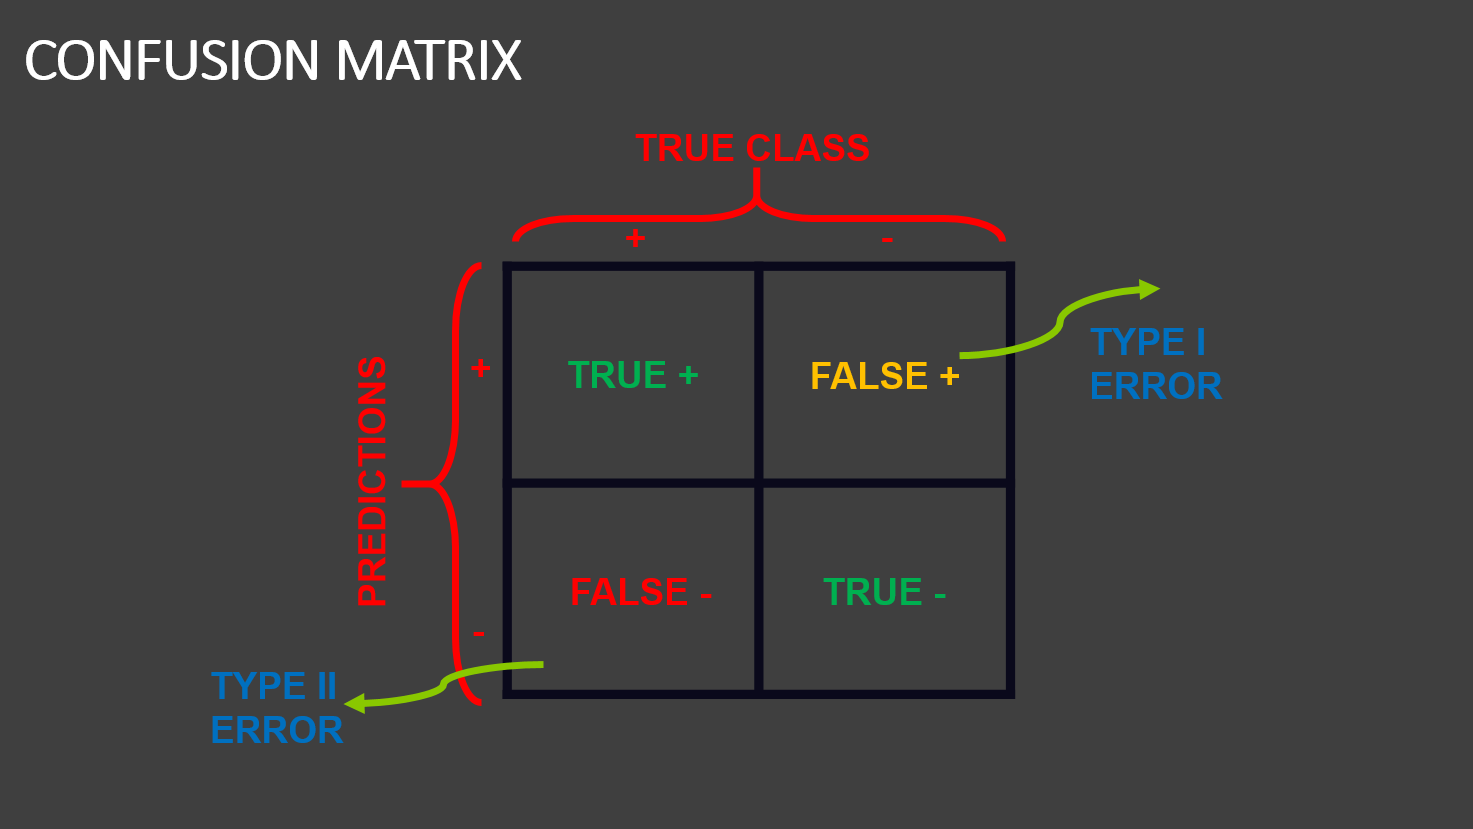

In [25]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

25/25 [==============================] - 42s 2s/step - loss: 0.5848 - accuracy: 0.7325
Accuracy Test : 0.7325000166893005


In [26]:
# assigning label names to the corresponding indexes
labels = {0: 'no-ship', 1: 'ship'}

In [27]:
# loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  #code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  #resizing the image to (256,256)
  img = img.resize((256,256))
  #appending image to the image list
  image.append(img)
  #converting image to array
  img = np.asarray(img, dtype= np.float32)
  #normalizing the image
  img = img / 255
  #reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  #making prediction of the model
  predict = model.predict(img)
  #getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  #appending the predicted class to the list
  prediction.append(labels[predict])
  #appending original class to the list
  original.append(test['Labels'].tolist()[item])


In [28]:
# Getting the test accuracy 
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.7325


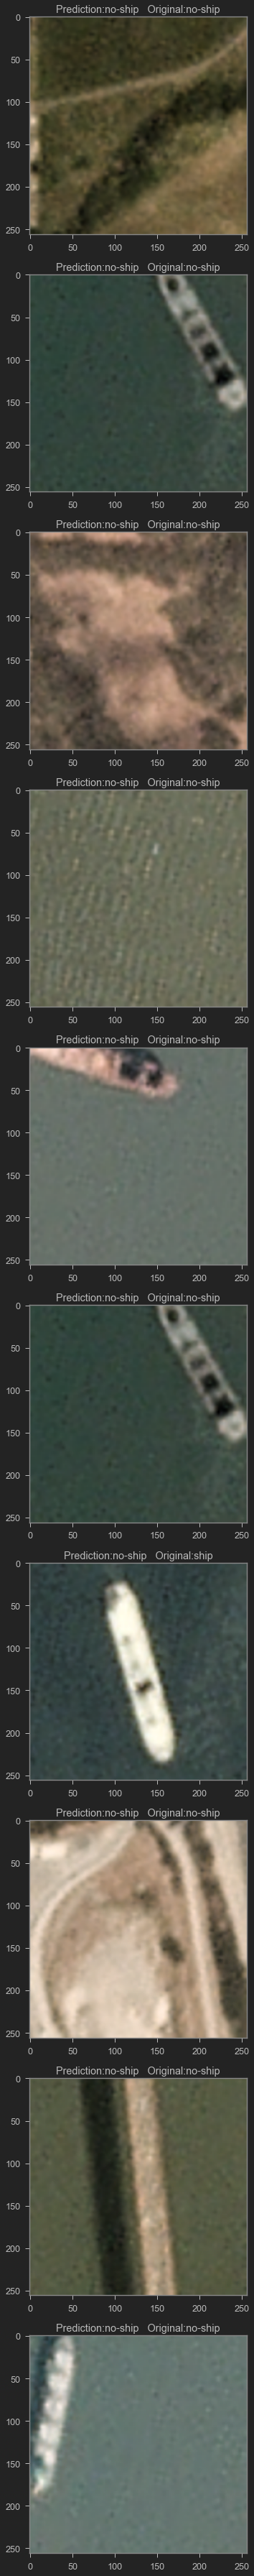

In [29]:
fig, axs = plt.subplots(10,1, figsize=(50,50))
count = 0
for i in range(10):
  j = random.randint(0,len(image))
  axs[count].title.set_text("Prediction:" + prediction[j] +"   Original:" + original[j])
  axs[count].imshow(image[j])  
  count += 1

fig.tight_layout()

MINI CHALLENGE #5: 
 - print out the classification report 
 - print out the confusion matrix and comment on the model performance


# CONGRATULATIONS ON FINISHING THE PROJECT!

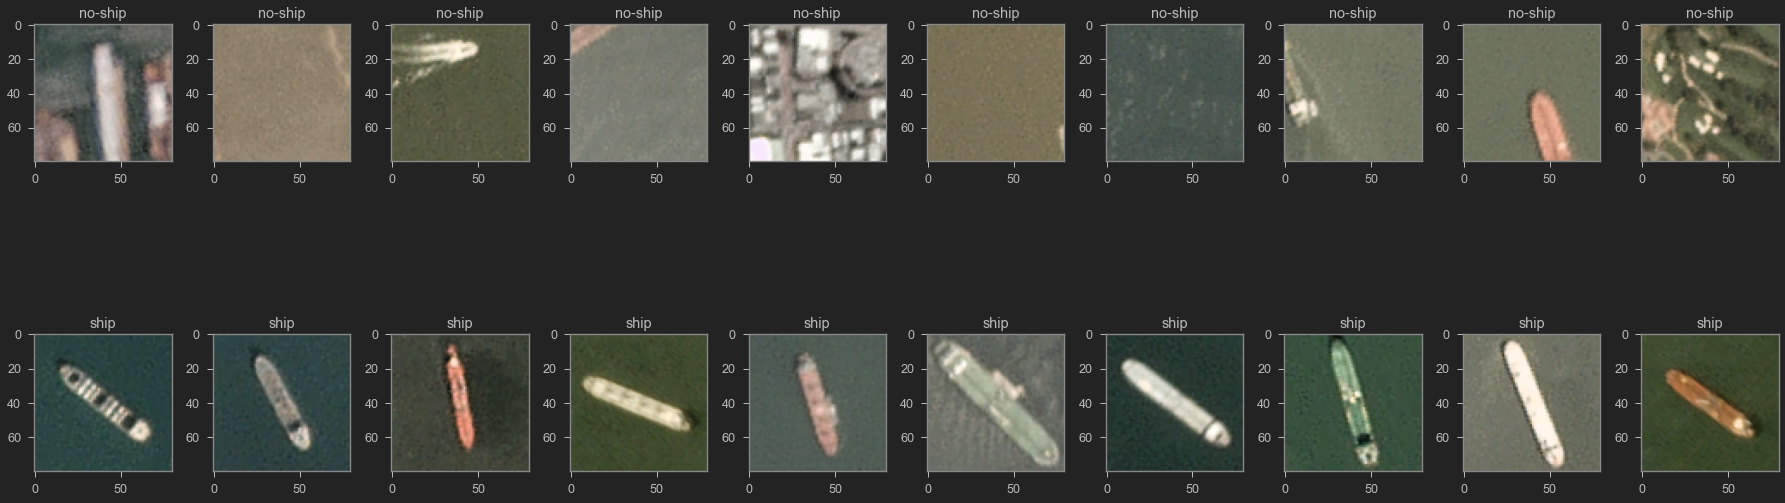

In [30]:
# Visualize the images in the dataset

fig, axs = plt.subplots(2, 10, figsize = (25, 10))
count = 0
for i in os.listdir('./Data'):
  # get the list of images in the particualr class
  train_class = os.listdir(os.path.join('Data',i))
  # plot 10 images per class
  for j in range(10):
    img = os.path.join('Data', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

MINI CHALLENGE #2 SOLUTION:

- Experiment with other image augmentation strategies to the training data. Pick at least 1 augmentation strategy. 

HINT: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


In [31]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

MINI CHALLENGE #3 SOLUTION:
- Try adding a dense layer with 1000 neurons, print out model summary and compare performance.

In [32]:
model = Sequential()

# 1st  Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4),activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 4th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1),activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1),activation='relu'))

# 6th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu'))

# 7th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096,activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096,activation='relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000,activation='relu'))

# 4th Fully Connected Layer
model.add(Dense(1000,activation='relu'))

model.add(Dense(1000,activation='relu'))


# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(2,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 256)       221440    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 27, 27, 256)       590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 512)       1180160   
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 512)        

MINI CHALLENGE #4 SOLUTION:
- Try to use a different number of epochs and retrain the model 

In [33]:
# Try optimizers like adam, ndam
# Change the value of epoch to 30

MINI CHALLENGE #5 SOLUTION: 
 - print out the classification report 
 - print out the confusion matrix and comment on the model performance


In [34]:
# classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

     no-ship       0.73      1.00      0.85       586
        ship       0.00      0.00      0.00       214

    accuracy                           0.73       800
   macro avg       0.37      0.50      0.42       800
weighted avg       0.54      0.73      0.62       800



C:\Users\nesto\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nesto\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nesto\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion_matrix')

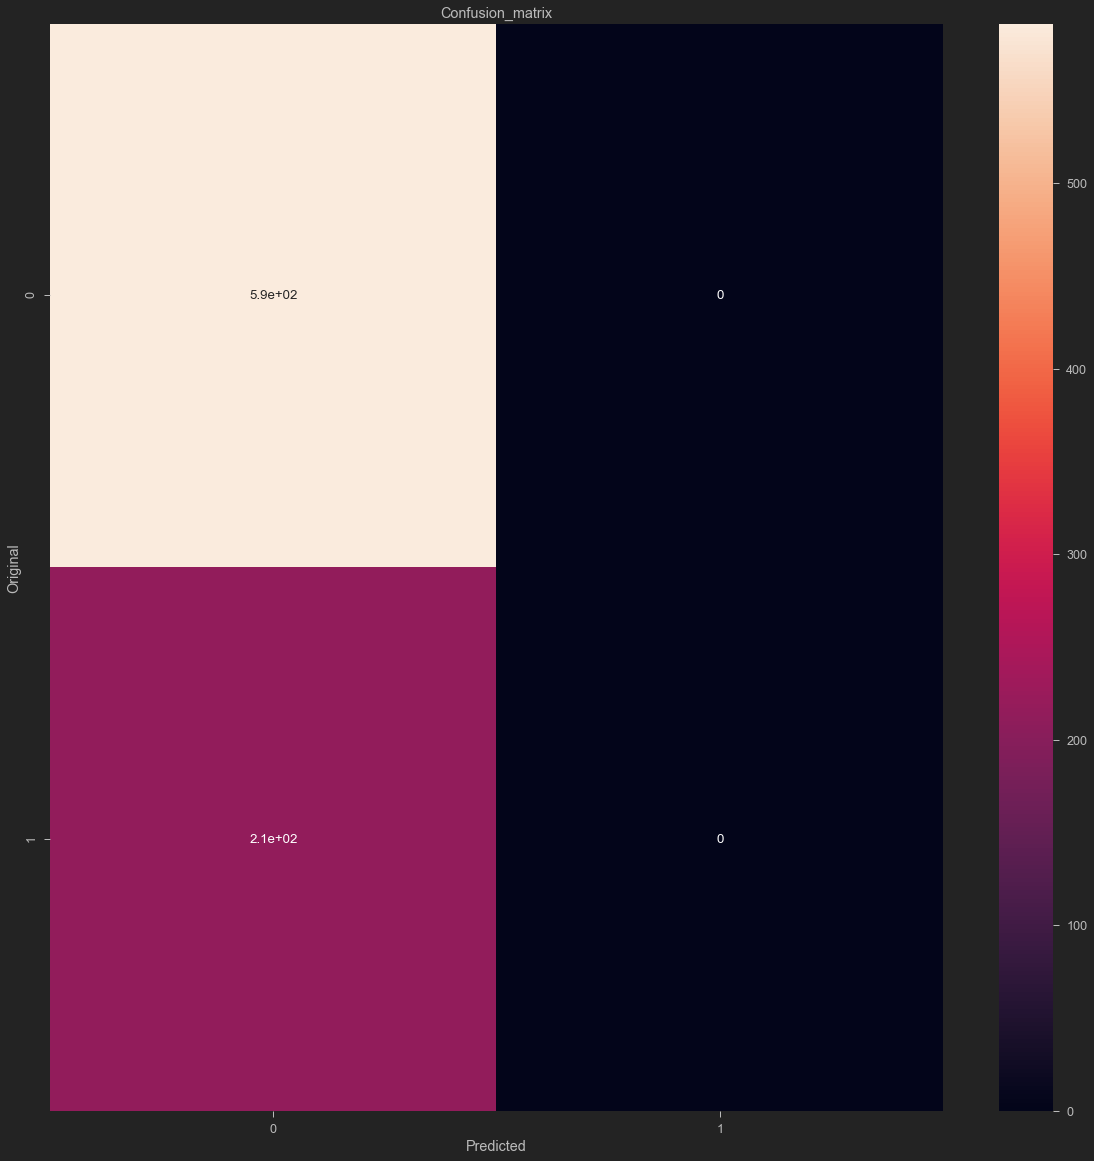

In [35]:
# plotting confusion matrix
plt.figure(figsize=(20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')